In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Feedback Simulation
We have two systems, *system A* and *system B* that are interconnected in a closed loop. Both systems have one input channel and one output channel, labeled as $x_A, x_B$ for the inputs, and $y_A, y_B$ for the outputs.
Since the systems are interconnected in a closed loop, the IO variables are related to each other. Formally, we can write
$$ 
    y_A = f(x_A, \dot{x}_A, t), \;\;\;\; y_B = g(x_B, \dot{x}_B, t),
$$
where $f$ and $g$ are control functions, $t$ is time. Since, we have a direct coupling, we have $y_A = x_B$ and $y_B = x_A$, hence
$$
    x_B = f(x_A, \dot{x}_A, t), \;\;\;\; x_A = g(x_B, \dot{x}_B, t).
$$
At the time $t=0$, we have initial conditions
$$
    x_A = x_A^{(0)}, \;\;\; x_B = x_B^{(0)}, \;\;\; \dot{x}_A = \dot{x}_A^{(0)}, \;\;\; \dot{x}_B = \dot{x}_B^{(0)}.
$$

### Thermostat and Heat Control
In our first simualted scenario, the system A is a thermostat. It has a system, whose temperature needs to be stabilized, the heat source with consant power $Q$, (temperature gained per unit time), 
and a relay, to turn the heat source ON and OFF. 
The input signal $x_A$ in this case is binary, $x_A = 0$ - turn off the heat source, and $x_A = 1$ - turn on the heat source. The environment temperature is $T_0$. The output signal $y_A$ is the current temperature of the 
thermostat. The second system, measures the temperature of the thermostat, compares it with the target temperature $T_{target}$, and makes a decision: if the measured temperature is within the tolerance window
$(T \geq T_{target}-\Delta T)$, then its output is $y_B=0$, a.k.a. turn off the heat source. If the measured temperature is too low $(T < T_{target}-\Delta T)$, then it sends signal $y_B=1$, a.k.a. turn on the heat source.

Assume that the heat dissipates proportional to the temperature difference $Q_{dis}=\alpha (T-T_0)$, where $T$ is the current temperature of the thermostat, $\alpha$ is constant, $Q_{dis}$ it the energy of the thermostat
that dissipated per unit time. When the heat source is OFF, the temperature changes according to
$$ 
    \frac{dT}{dt} = - \alpha (T-T_0),
$$
When the heat source is turned on, we write
$$
    \frac{dT}{dt} = Q - \alpha (T-T_0),
$$

In [92]:
TIME_STEP = 0.01    # time step of a single cycle

class Thermostat:
    def __init__(self, T_init: float) -> None:
        self.T = T_init    # current temperature of the thermostat
        
        self.Q = 15              # power of the heat source
        self.alpha = 1.0        # dissipation constant        
        self.T0 = 10            # environment temperature
        
    def run(self, x: int) -> float:
        if x == 0:
            self.T += -self.alpha*(self.T - self.T0)*TIME_STEP
        elif x == 1:
            self.T += (self.Q - self.alpha*(self.T - self.T0))*TIME_STEP
        
        return self.T
        
        
class Relay:
    def __init__(self) -> None:
        self.state = 0
        self.T_target = 30      # target temperature
        self.T_window = 1.0     # window of tolerance: (T_target +/- T_window) is considered as the correct temperature

    def run(self, T_measured: float) -> int:
        if T_measured > self.T_target + self.T_window:
            self.state = 0
        elif T_measured < self.T_target - self.T_window:
            self.state = 1
        
        return self.state

In [93]:
thermostat = Thermostat(40)
switch = Relay()

t_array  = np.arange(0,15,TIME_STEP)
yA_array = np.ndarray((t_array.size), dtype=np.float64)
yB_array = np.ndarray((t_array.size), dtype=np.float64)

In [94]:
yA = thermostat.T
for idx,_ in np.ndenumerate(t_array):
    yB = switch.run(yA)
    yA = thermostat.run(yB)
    yA_array[idx] = yA
    yB_array[idx] = yB

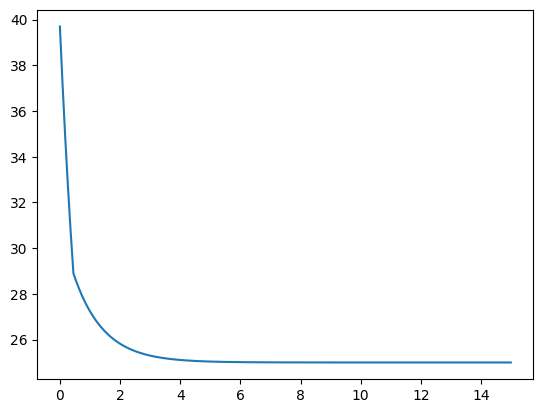

In [95]:
plt.plot(t_array, yA_array)

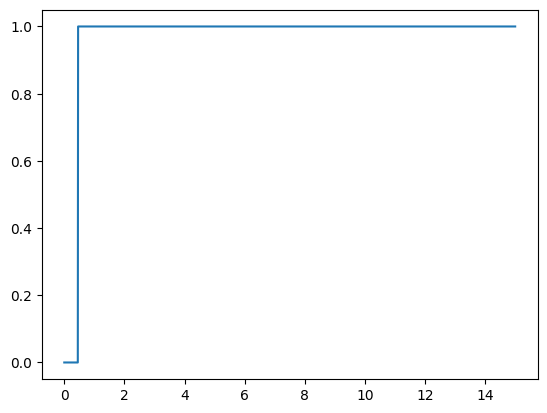

In [96]:
plt.plot(t_array, yB_array)